#### Importing basic python libraries for preprocessing and visualizations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting the data

In [3]:
geo_data_0 = pd.read_csv('Data//geo_data_0.csv')
geo_data_1 = pd.read_csv('Data//geo_data_1.csv')
geo_data_2 = pd.read_csv('Data//geo_data_2.csv')

### Exploring the Data (EDA)

In [4]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [12]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [13]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [14]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [18]:
#Checking for duplicates in the dataset
print('Duplicate data in geo_data_0:',geo_data_0.duplicated().sum())
print('Duplicate data in geo_data_1:',geo_data_1.duplicated().sum())
print('Duplicate data in geo_data_2:',geo_data_2.duplicated().sum())

Duplicate data in geo_data_0: 0
Duplicate data in geo_data_1: 0
Duplicate data in geo_data_2: 0


In [19]:
#Getting the shapes of the datasets
print('Shape of geo_data_0:',geo_data_0.shape)
print('Shape of geo_data_1:',geo_data_1.shape)
print('Shape of geo_data_2:',geo_data_2.shape)

Shape of geo_data_0: (100000, 5)
Shape of geo_data_1: (100000, 5)
Shape of geo_data_2: (100000, 5)


<AxesSubplot:>

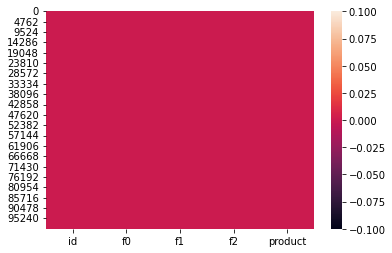

In [8]:
#Looking for the missing data in geo_data_0
sns.heatmap(geo_data_0.isnull())

<AxesSubplot:>

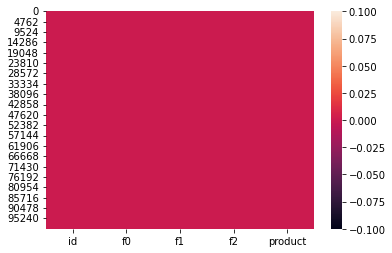

In [9]:
#Looking for the missing data in geo_data_1
sns.heatmap(geo_data_1.isnull())

<AxesSubplot:>

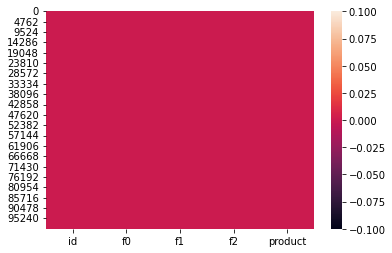

In [10]:
#Looking for the missing data in geo_data_2
sns.heatmap(geo_data_2.isnull())

Text(-1, 4.15, 'Exploring the relationship between the attributes')

<Figure size 576x720 with 0 Axes>

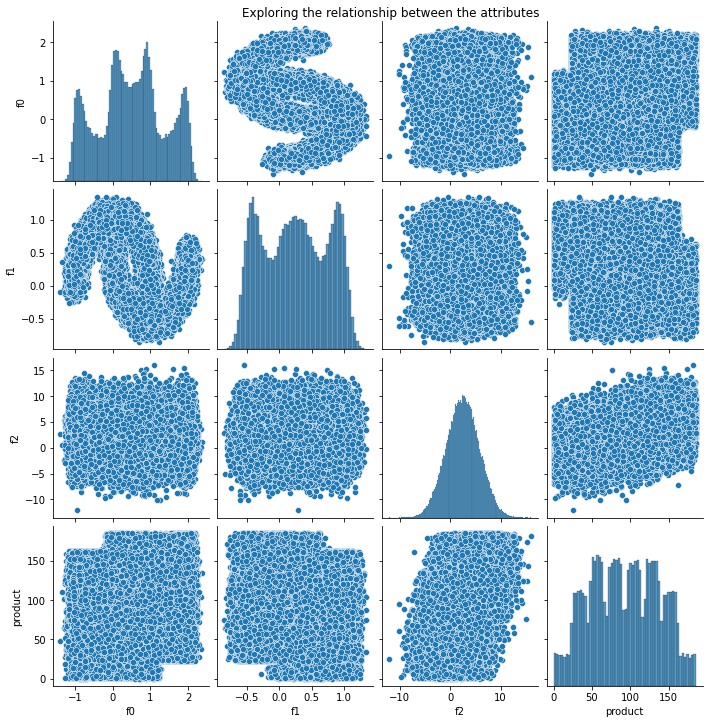

In [34]:
plt.figure(figsize=(8,10))
sns.pairplot(geo_data_0)
plt.title('Exploring the relationship between the attributes',y=4.15,x=-1)

Geo_data_0


<AxesSubplot:>

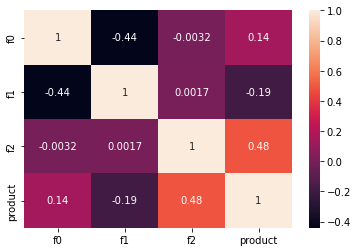

In [43]:
print('\033[1m' + 'Geo_data_0' + '\033[0m')
sns.heatmap(geo_data_0.corr(),annot=True)

Text(-1, 4.15, 'Exploring the relationship between the attributes')

<Figure size 576x720 with 0 Axes>

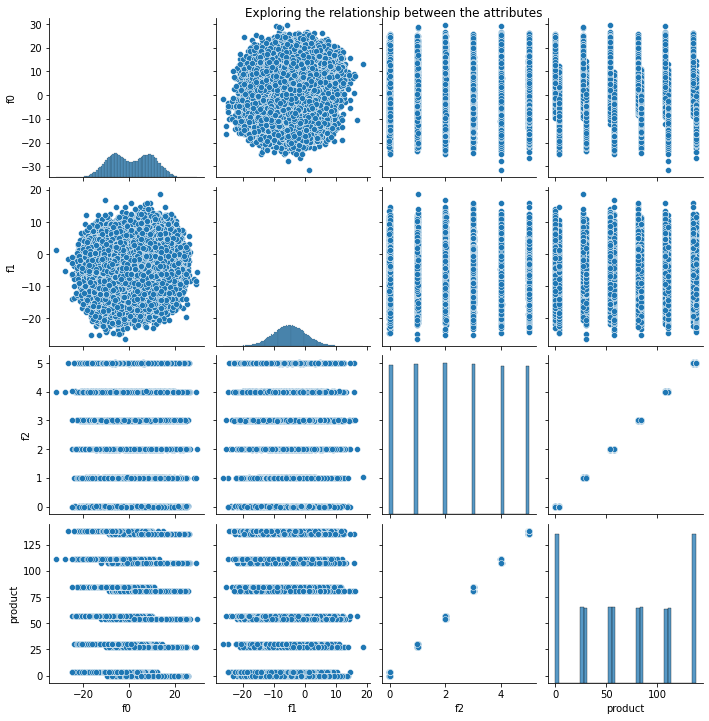

In [44]:
plt.figure(figsize=(8,10))
sns.pairplot(geo_data_1)
plt.title('Exploring the relationship between the attributes',y=4.15,x=-1)

Geo_data_1


<AxesSubplot:>

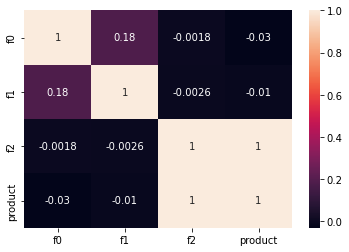

In [45]:
print('\033[1m' + 'Geo_data_1' + '\033[0m')
sns.heatmap(geo_data_1.corr(),annot=True)

Text(-1, 4.15, 'Exploring the relationship between the attributes')

<Figure size 576x720 with 0 Axes>

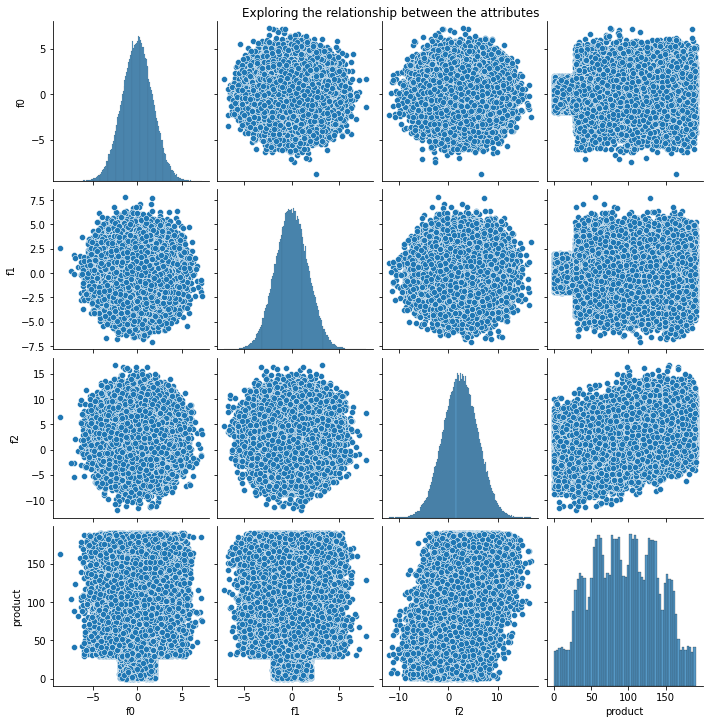

In [46]:
plt.figure(figsize=(8,10))
sns.pairplot(geo_data_2)
plt.title('Exploring the relationship between the attributes',y=4.15,x=-1)

Geo_data_2


<AxesSubplot:>

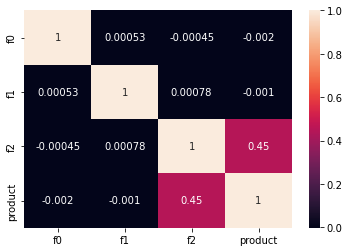

In [47]:
print('\033[1m' + 'Geo_data_2' + '\033[0m')
sns.heatmap(geo_data_2.corr(),annot=True)

### Training the model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [52]:
# function to train a model and make predictions
def train_test_predict(df):
    
    # dropping unimportant features
    df = df.drop(['id'], axis=1)

    # declare variables for features and target
    target = df['product']
    features = df.drop(['product'], axis=1)

    # split data into 75% training and 25% testing sets
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    # features scaling
    scaler = StandardScaler()
    scaler.fit(features_train)
    # transform the training set and the test set using transform()
    features_train = scaler.transform(features_train)
    features_test  = scaler.transform(features_test)

    # linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train) # train model
    test_predictions = pd.Series(model.predict(features_test), index=target_test.index) # make prediction using test set
    return test_predictions, target_test

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [54]:
# function to calculate regression metrics
def reg_metrics(y_test, y_pred):
    print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('Explained variance score: %.4f' % explained_variance_score(y_test, y_pred))
    print('Mean squared error: %.3f' % mean_squared_error(y_test, y_pred))
    print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Variance score: %.4f' % r2_score(y_test, y_pred)) # coeff. of determination
    forecast_err = np.array(y_test) - np.array(y_pred)
    print('Forecast bias: %.4f' % (np.sum(forecast_err) * 1.0/len(y_pred)))

##### geo_data_0

In [60]:
# store predictions and test data sets
test_predictions_0, target_test_0 = train_test_predict(geo_data_0)

# regression metric for region 1
reg_metrics(test_predictions_0, target_test_0)

print()

# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_0.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_0.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_0, target_test_0)))

Mean absolute error: 30.92
Explained variance score: -1.6286
Mean squared error: 1412.213
RMSE: 37.5794
Variance score: -1.6291
Forecast bias: 0.5140

Average volume of reserves: 92.08
The average volume of predicted reserves is: 92.59
The model's RMSE is : 37.5794


##### geo_data_1

In [59]:
# store predictions and test data sets
test_predictions_1, target_test_1 = train_test_predict(geo_data_1)

# regression metric for region 1
reg_metrics(test_predictions_1, target_test_1)

print()

# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_1.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_1.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_1, target_test_1)))

Mean absolute error: 0.72
Explained variance score: 0.9996
Mean squared error: 0.798
RMSE: 0.8931
Variance score: 0.9996
Forecast bias: 0.0054

Average volume of reserves: 68.72
The average volume of predicted reserves is: 68.73
The model's RMSE is : 0.8931


##### geo_data_2

In [58]:
# store predictions and test data sets
test_predictions_2, target_test_2 = train_test_predict(geo_data_2)

# regression metric for region 1
reg_metrics(test_predictions_2, target_test_2)

print()

# volume of predicted reserves and actual reserves
print('Average volume of reserves: %.2f' % target_test_2.mean())
print('The average volume of predicted reserves is: %.2f' % test_predictions_2.mean())
print("The model's RMSE is : %.4f" % np.sqrt(mean_squared_error(test_predictions_2, target_test_2)))

Mean absolute error: 32.79
Explained variance score: -3.0653
Mean squared error: 1602.378
RMSE: 40.0297
Variance score: -3.0653
Forecast bias: 0.0808

Average volume of reserves: 94.88
The average volume of predicted reserves is: 94.97
The model's RMSE is : 40.0297


In [66]:
data = [['geo_data_0',92.08,92.59,37.58,30.92],['geo_data_1',68.72,68.73,0.89,0.72],['geo_data_2',94.88,94.79,40.03,32.79]]
results = pd.DataFrame(data,columns=['Regions','Average Actual Reserve(in thousands STB)','Average Predicted Reserve(in thousands STB)','RMSE','MAE'])

In [70]:
results

,Regions,Average Actual Reserve(in thousands STB),Average Predicted Reserve(in thousands STB),RMSE,MAE
0,geo_data_0,92.08,92.59,37.58,30.92
1,geo_data_1,68.72,68.73,0.89,0.72
2,geo_data_2,94.88,94.79,40.03,32.79


### Profit Calculation

In [72]:
from scipy import stats as st

In [73]:
# profit determination conditions
region_points = 500 # 500 oil wells required
best_region_for_profit = 200 # 200 oil wells 
capital_cost = 100 * 10**6 # development budget for 200 wells (100 USD million)
cost_per_bbl = 4.5 # revenue from 1 unit of product (in thousand barrels) = $4,500 
risk_of_losses = 0.025

In [74]:
# volume of reserves calculation
revenue = cost_per_bbl * best_region_for_profit
volume_of_reserves = capital_cost / revenue
print('The volume of reserves required to develop a new well without loss: %.2f' % volume_of_reserves, 'Stock Tank Barrels (STB).')

The volume of reserves required to develop a new well without loss: 111111.11 Stock Tank Barrels (STB).


In [75]:
# function to calculate the highest prediction in each region
def highest_prediction(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    print('The highest prediction value in this region is: %.2f' % total_selected_reserves_volume_target,
          'STB or %.2f' % (total_selected_reserves_volume_target / 10**6), 'MMSTB')

# function to calculate profit from a set of selected oil wells and model predictions
def reserves_profit(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    print('The selected reserves profit is: $%.2f' % selected_reserves_profit)

#### Region with the highest value of predictions

In [76]:
# highest value prediction in region 1
print('Region 1')
highest_prediction(target_test_0, test_predictions_0, 200)
# highest value prediction in region 2
print('Region 2')
highest_prediction(target_test_1, test_predictions_1, 200)
# highest value prediction in region 3
print('Region 3')
highest_prediction(target_test_2, test_predictions_2, 200)

Region 1
The highest prediction value in this region is: 29601835.65 STB or 29.60 MMSTB
Region 2
The highest prediction value in this region is: 27589081.55 STB or 27.59 MMSTB
Region 3
The highest prediction value in this region is: 28245222.14 STB or 28.25 MMSTB


#### Profit for obtained volume of reserves in each region

In [77]:
# profit from a set of selected oil wells and model predictions in region 1
print('Region 1')
reserves_profit(target_test_0, test_predictions_0, 200)
# profit from a set of selected oil wells and model predictions in region 2
print('Region 2')
reserves_profit(target_test_1, test_predictions_1, 200)
# profit from a set of selected oil wells and model predictions in region 3
print('Region 3')
reserves_profit(target_test_2, test_predictions_2, 200)

Region 1
The selected reserves profit is: $33208260.43
Region 2
The selected reserves profit is: $24150866.97
Region 3
The selected reserves profit is: $27103499.64


### Calculating Risks and Revenues

In [78]:
# compute distribution of profits
def revenue(y_test, y_pred, count):
    highest_reserves_volume_predicted = y_pred.sort_values(ascending=False)
    selected_reserves_volume_target = y_test[highest_reserves_volume_predicted.index][:count]
    total_selected_reserves_volume_target = selected_reserves_volume_target.sum() * 1000
    selected_reserves_profit = total_selected_reserves_volume_target * cost_per_bbl - capital_cost
    return selected_reserves_profit

In [81]:
# compute profit from 1000 samples of revenue using bootstrapping technique
def bootstrapping_revenue(y_test, y_pred):
    state = np.random.RandomState(12345) 
    
    # store the 99% quantile values to the profit variable
    profit = []
    for i in range(1000):
        target_subsample = y_test.sample(n=region_points, replace=True, random_state=state)
        predicted_subsample = y_pred[target_subsample.index]
        profit.append(revenue(target_subsample, predicted_subsample, best_region_for_profit))
    return pd.Series(profit)

In [82]:
# compute bootstrap profit, confidence interval and risk of losses
def bootstrap_profit_ci_risk(y_test, y_pred):
    profit = bootstrapping_revenue(y_test, y_pred) # change type for convenience
    mean_profit = profit.mean() # average profit
    confidence_interval = st.t.interval(
        0.95, len(profit)-1, mean_profit, profit.sem()
    ) # 95% C.I.
    losses = profit[profit < 0]
    risk_of_losses = len(losses) / len(profit)
    print('The average profit is: %.2f' % mean_profit)
    print('The 95% confidence interval: ', confidence_interval)
    print('The risk of losses is: {:.2%}'.format(risk_of_losses))

In [79]:
# average profit, 95% C.I., and risk in region 1
print('Region 1')
bootstrap_profit_ci_risk(target_test_0, test_predictions_0)
# average profit, 95% C.I., and risk in region 2
print('Region 2')
bootstrap_profit_ci_risk(target_test_1, test_predictions_1)
# average profit, 95% C.I., and risk in region 3
print('Region 3')
bootstrap_profit_ci_risk(target_test_2, test_predictions_2)

Region 1
The average profit is: 4259385.27
The 95% confidence interval:  (4087322.0706869904, 4431448.467524866)
The risk of losses is: 6.00%
Region 2
The average profit is: 5152227.73
The 95% confidence interval:  (5016214.761763219, 5288240.707102582)
The risk of losses is: 1.00%
Region 3
The average profit is: 4350083.63
The 95% confidence interval:  (4174535.520413581, 4525631.735241537)
The risk of losses is: 6.40%


### Distribution of Profit from bootstrapping technique

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

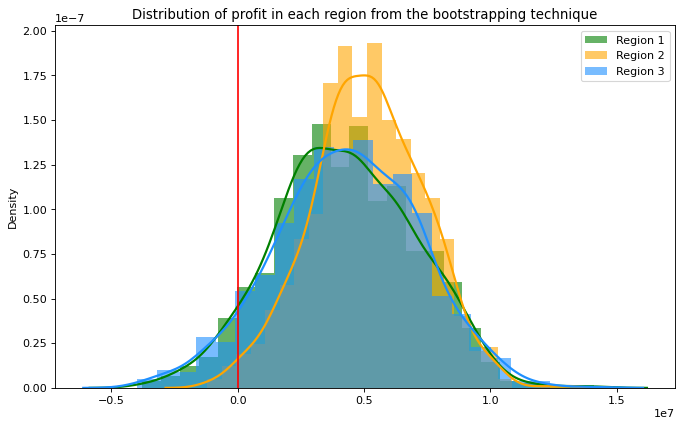

In [80]:
# profit from each region
region_1_profit = bootstrapping_revenue(target_test_0, test_predictions_0)
region_2_profit = bootstrapping_revenue(target_test_1, test_predictions_1)
region_3_profit = bootstrapping_revenue(target_test_2, test_predictions_2)

# distribution plot
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,6), dpi= 80)
sns.distplot(region_1_profit, color='green', label='Region 1', **kwargs)
sns.distplot(region_2_profit, color='orange', label='Region 2', **kwargs)
sns.distplot(region_3_profit, color='dodgerblue', label='Region 3', **kwargs)
plt.axvline(0, c="r")
plt.title('Distribution of profit in each region from the bootstrapping technique')
plt.legend();